<a href="https://colab.research.google.com/github/acamposmcr/Python/blob/master/An%C3%A1lisis_Estad%C3%ADstico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***
# Cuaderno interactivo para análisis estadístico 
## Laboratorio
***

<a id='indice'></a>

## Contenidos:
### Configuración Inicial:
1. **Inicialización del entorno**
    - Importación de [librerías](#librerias)
    - Establecimiento de [variables](#variables) globales
    
    
2. **Carga de archivos de datos a memoria**
    - Carga de archivos para análisis [estadístico](#estadistico)
    - Establecer rangos de fecha: análisis [estadístico](#rangos_estadistico)
    - Carga de archivos para análisis de [producción](#produccion)
    - Establecer rangos de fecha: análisis de [producción](#rangos_produccion)
    - Carga de archivos para análisis tiempo de [digitación](#digitacion)
    - Establecer rangos de fecha: análisis de tiempo de [digitación](#rangos_digitacion)
    
  
3. **Exploración preliminar de datos**
    - Exploración de set de datos para análisis [estadístico](#expl_estadistico)
    - Exploración de set de datos para análisis de [producción](#expl_produccion)
    - Exploración de set de datos para análisis de tiempo de [digitación](#expl_digitacion)


4. **Elaboración del informe**
    - Cantidad de muestras [recibidas](#muestras)
    - Tiempo de [tránsito](#transito) de las muestras
    - Cantidad y tiempo de tránsito de las muestras:
        - Por vía de [ingreso](#ingreso)
        - Por tipo de [centro](#centro)
        - Por [región](#region)
    - Edad de toma de muestras ([primeras](#primeras) muestras)
    - Edad de toma de muestras ([segundas](#segundas) muestras)
    - Muestras [insatisfactorias](#insatisf) y su criterio de selección
    - [Producción](#prod_lab) del laboratorio
    - [Análisis](#analisis) de tiempos de digitación
    - [Cobertura](#cobertura) del programa y muestras insatisfactorias


5. **Otros datos administrativos**
    - Estadísticas por [centros](#centros):
        - Lista de centros
        - IDI
    - Estadísticas [varias](#varias):
        - Edad de la [madre](#madre) al nacer el bebé
        - [Semanas](#semanas) de gestación
        - [Peso](#peso) al nacer
        - [Clasificación](#clasif) de muestras (Warncode)
        - [Clasificación](#clasif_centro) de muestras (Warncode) por Centro
        - Producción por [usuario](#usuario)
        - Muestras por [provincia](#provincia)
    
 
6. **Apéndices**
    - Instrucciones para el uso de [Jupyter](#jupyter) Notebook
    - Instrucciones para escritura en [Markdown](#markdown)
    - Descripción de algunas funciones de [Python](#python)
    

### 1. Inicialización del entorno

<a id='librerias'></a>
***Importación de librerías***

In [0]:
# Importación de librerías

import os
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
import warnings

print('\nVersiones de las librerías importadas:\n')
print('numpy:',np.__version__)
print('pandas:',pd.__version__)
print('matplotlib:',mpl.__version__)
print('seaborn:',sns.__version__)
print('widgets:',widgets.__version__)

# al momento de la programación se utilizaron las siguientes versiones:
# numpy: 1.16.3
# pandas: 0.24.2
# matplotlib: 3.0.3
# seaborn: 0.9.0
# widgets: 7.4.2


Versiones de las librerías importadas:

numpy: 1.16.2
pandas: 0.24.2
matplotlib: 3.0.3
seaborn: 0.9.0
widgets: 7.4.2


Volver al [Indice](#indice)

<a id='variables'></a>
***Establecimiento de variables globales***

In [0]:
%matplotlib inline
warnings.filterwarnings('ignore')

ruta_notebook = os.getcwd()

if os.name == 'posix':
    ruta_data = ruta_notebook + '/Data/'
    ruta_output = ruta_notebook + '/Output/'
    ruta_graficos = ruta_notebook + '/Graficos/'
    print('\nSistema Operativo: ',os.uname().sysname)
    print('Versión: ',os.uname().release)
    print('Arquitectura: ',os.uname().machine)
    español='es_CR.utf8'
elif os.name == 'nt':
    print('\nSistema Operativo: Windows')
    ruta_data = ruta_notebook + '\Data\\'
    ruta_output = ruta_notebook + '\Output\\'
    ruta_graficos = ruta_notebook + '\Graficos\\'
    español='es'
else:
    print('Sistema operativo desconocido')
    
print('\nRutas para los diferentes archivos:')
print('Archivos .ipynb:',ruta_notebook)
print('Archivos de datos:',ruta_data)
print('Archivos .csv para informes:',ruta_output)
print('Gráficos para informes:',ruta_graficos)

def tiempo_prom(x):
    
    dd = x.days*24
    hh = str(dd + x.seconds//3600)
    mm = str(x.seconds%3600//60)
    ss = str(x.seconds%60)
    
    if len(hh)<2:
        hh= '0'+ hh
    if len(mm)<2:
        mm = '0'+ mm
    if len(ss)<2:
        ss = '0'+ ss
        
    f = hh +':' + mm + ':' + ss
    
    return f 

Volver al [Indice](#indice)

### 2. Carga de archivos de datos a memoria

<a id='estadistico'></a>
***Carga de archivos para análisis estadístico***

In [0]:
radb=widgets.RadioButtons(options=['CSV','EXCEL'],
                          description='Selección:',disabled=False)
print('Seleccione el tipo de archivo y luego presione [Shift]+[Enter] en la siguiente celda:')
display(radb)

Seleccione el tipo de archivo y luego presione [Shift]+[Enter] en la siguiente celda:


RadioButtons(description='Selección:', options=('CSV', 'EXCEL'), value='CSV')

In [0]:
tipoArchivo = radb.value
if radb.value == 'CSV':
    nombre_archivo = 'Consultas Starlims 2018.csv' # cambiar el nombre del archivo correcto
    delim = ',' # en caso de ser tabulador colocar '\t'
    print('El archivo de datos se encuentra en: ',ruta_data + nombre_archivo)
    print('Cargando archivo en memoria ...')
    df = pd.read_csv(ruta_data + nombre_archivo,delimiter = delim)
    print('Carga finalizada: archivo de fuente de datos subido a memoria en variable: <df>')
    
    print('\nArchivo de datos en formato CSV, convirtiendo formato de fechas\n')
    print('Fecha Recibida ORIGINAL:',df['Fecha Recibida'][0])
    print('Convirtiendo formato ...')
    df['Fecha Recibida'] = df['Fecha Recibida'].apply(pd.to_datetime)
    print('Fecha Recibida CONVERTIDA:', df['Fecha Recibida'][0],'\n')
    print('Fecha de Nacimiento ORIGINAL:', df['Fecha de Nacimiento'][0])
    print('Convirtiendo formato ...')
    df['Fecha de Nacimiento'] = df['Fecha de Nacimiento'].apply(pd.to_datetime)
    print('Fecha de Nacimiento CONVERTIDA:', df['Fecha de Nacimiento'][0],'\n')
    print('Fecha de Recolección ORIGINAL:', df['Fecha de Recolección'][0])
    print('Convirtiendo formato ...')
    df['Fecha de Recolección'] = df['Fecha de Recolección'].apply(pd.to_datetime)
    print('Fecha de Recolección CONVERTIDA:', df['Fecha de Recolección'][0],'\n')
    print('Conversión de formato de fechas finalizada')
    
elif radb.value == 'EXCEL':
    nombre_archivo = 'Consultas Starlims 2018.xlsx' # cambiar el nombre del archivo correcto
    nombre_hoja = 'Hoja1'
    print('El archivo de datos se encuentra en: ', ruta_data + nombre_archivo)
    print('Cargando archivo en memoria ...')
    df = pd.read_excel(ruta_data + nombre_archivo, sheet_name = nombre_hoja)
    print('Carga finalizada: archivo de fuente de datos subido a memoria en variable: <df>')

df['DiaSemana'] = df['Fecha Recibida'].dt.day_name(locale=español) 
df['Mes'] = df['Fecha Recibida'].dt.month_name(locale=español)
df['Año'] = df['Fecha Recibida'].dt.year

In [0]:
print(radb.value)
df.info()

Volver al [Indice](#indice)

<a id='rangos_estadistico'></a>
***Establecer rangos de fecha: análisis estadístico***

In [0]:
fecha_min=str(df['Fecha Recibida'].min())[:10]
fecha_max=str(df['Fecha Recibida'].max())[:10]
print('La variable de datos df contiene valores de fechas entre: {} y {}\n'
      .format(fecha_min,fecha_max))

año=widgets.Dropdown(options = range(2010,2030,1),
                     value=2018,description='Año:',
                     disabled=False)

radb=widgets.RadioButtons(options=['Fecha', 'Rango Fecha', 'Mes','Rango Mes'],
                          description='Selección:',
                          disabled=False)

print('Seleccione el criterio de búsqueda y luego presione [Shift]+[Enter] en la siguiente celda:')

display(año,radb)

In [0]:
print('\nIngrese los valores de fechas requeridos para la búsqueda y luego presione [Shift]+[Enter] en la siguiente celda:\n')
if radb.value == 'Fecha':
    a = widgets.DatePicker(description ='Fecha',disabled = False)
    display(a)
elif radb.value == 'Rango Fecha':
    a = widgets.DatePicker(description ='Fecha Inicial',disabled = False)
    b = widgets.DatePicker(description ='Fecha Final',disabled = False)
    display(a)
    display(b)
elif radb.value == 'Mes':
    meses = ['Enero','Febrero','Marzo','Abril','Mayo','Junio','Julio',
             'Agosto','Septiembre','Octubre','Noviembre','Diciembre']
    a=widgets.Dropdown(options = meses, description='Mes:',disabled=False)
    display(a)
elif radb.value == 'Rango Mes':
    meses = ['Enero','Febrero','Marzo','Abril','Mayo','Junio','Julio',
             'Agosto','Septiembre','Octubre','Noviembre','Diciembre']
    a = widgets.SelectionRangeSlider(options = meses,disabled = False)
    display(a)

In [0]:
año_busq = año.value

if radb.value == 'Fecha':
    fecha_busq = str(a.value)
    
    data = df[(df['Año'] == año_busq) & 
              (df['Fecha Recibida'] == fecha_busq)]
    
    print('\nA partir de aquí se trabaja con la variable <data> que contiene datos generados')
    print('el día {} del año {}\n'.format(fecha_busq,año_busq))
    
    data.info()
    
elif radb.value == 'Rango Fecha':
    fecha_ini = str(a.value)
    fecha_fin = str(b.value)
    
    data = df[(df['Año'] == año_busq) & 
              (df['Fecha Recibida'] >= fecha_ini) & 
              (df['Fecha Recibida'] <= fecha_fin)]
    
    print('\nA partir de aquí se trabaja con la variable <data> que contiene datos generados')
    print('entre {} y {} del año {}\n'.format(fecha_ini,fecha_fin,año_busq))
    
    data.info()

elif radb.value == 'Mes':
    mes = a.value
    
    data = df[(df['Año'] == año_busq) & 
              (df['Mes'] == mes)]
    
    print('\nA partir de aquí se trabaja con la variable <data> que contiene datos generados')
    print('el mes de {} del año {}\n'.format(mes,año_busq))
    
    data.info()
    
elif radb.value == 'Rango Mes':
    meses = ['Enero','Febrero','Marzo','Abril','Mayo','Junio','Julio',
             'Agosto','Septiembre','Octubre','Noviembre','Diciembre']
    rango_mes = meses[a.index[0]:a.index[1]+1]
    
    data = df[(df['Año'] == año_busq) & 
              (df['Mes'].isin(rango_mes))]
    
    print('\nA partir de aquí se trabaja con la variable <data> que contiene datos generados')
    print('entre los meses de {} del año {}\n'.format(rango_mes,año_busq))
   
    data.info()

Volver al [Indice](#indice)

<a id='produccion'></a>
***Carga de archivos para análisis de producción***

In [0]:
radb=widgets.RadioButtons(options=['CSV','EXCEL'],
                          description='Selección:',disabled=False)
print('Seleccione el tipo de archivo y luego presione [Shift]+[Enter] en la siguiente celda:')
display(radb)

In [0]:
if radb.value == 'CSV':
    nombre_archivo = 'Tiempo de procesamiento de muestras 2018.csv'
    delim = ';' # en caso de ser tabulador colocar '\t' 
    print('El archivo de datos se encuentra en: ', ruta_data + nombre_archivo)
    print('Cargando archivo en memoria ...')
    df = pd.read_csv(ruta_data + nombre_archivo, delimiter = delim,encoding = 'latin-1')
    print('Carga finalizada: archivo de fuente de datos subido a memoria en variable: <df>')
    
elif radb.value == 'EXCEL':
    nombre_archivo = 'Tiempo de procesamiento de muestras 2018.xlsx'
    nombre_hoja = 'Hoja1'
    print('El archivo de datos se encuentra en: ', ruta_data + nombre_archivo)
    print('Cargando archivo ...')
    df = pd.read_excel(ruta_data + nombre_archivo, sheet_name = nombre_hoja)
    print('Carga finalizada: archivo de fuente de datos subido a memoria en variable: <df>')
    
print('Convirtiendo campos de fecha y creando campos fecha-hora...')
df['FECHA_RECIBIDA'] = df['FECHA_RECIBIDA'].str[:10]
df['FECHA_PROCESADA'] = df['FECHA_PROCESADA'].str[:10]
df['Fecha Aprobada'] = df['Fecha Aprobada'].str[:10]
df['FECHA_HORA_RECIBIDA'] = df['FECHA_RECIBIDA'] + ' ' + df['HORA_RECIBIDA'].astype(str)
df['FECHA_HORA_RECIBIDA'] = df['FECHA_HORA_RECIBIDA'].apply(pd.to_datetime)
df['FECHA_HORA_PROCESADA'] = df['FECHA_PROCESADA'] + ' ' + df['HORA_PROCESADA'].astype(str)
df['FECHA_HORA_PROCESADA'] = df['FECHA_HORA_PROCESADA'].apply(pd.to_datetime)
df['FECHA_HORA_APROBADA'] = df['Fecha Aprobada'] + ' ' + df['Hora Aprobada'].astype(str)
df['FECHA_HORA_APROBADA'] = df['FECHA_HORA_APROBADA'].apply(pd.to_datetime)
print('Conversión finalizada')      
df['MES'] = df['FECHA_HORA_RECIBIDA'].dt.month_name(locale = español)
df['AÑO'] = df['FECHA_HORA_RECIBIDA'].dt.year
df.info()

Volver al [Indice](#indice)

<a id='rangos_produccion'></a>
***Establecer rangos de fecha: análisis de producción***

In [0]:
fecha_min=str(df['FECHA_HORA_RECIBIDA'].min())[:10]
fecha_max=str(df['FECHA_HORA_RECIBIDA'].max())[:10]
print('La variable de datos df contiene valores de fechas entre: {} y {}\n'
      .format(fecha_min,fecha_max))

año=widgets.Dropdown(options = range(2010,2030,1),
                     value=2018,description='Año:',
                     disabled=False)

radb=widgets.RadioButtons(options=['Fecha', 'Rango Fecha', 'Mes','Rango Mes'],
                          description='Selección:',
                          disabled=False)

print('Seleccione el criterio de búsqueda y luego presione [Shift]+[Enter] en la siguiente celda:')

display(año,radb)

In [0]:
print('\nIngrese los valores de fechas requeridos para la búsqueda y luego presione [Shift]+[Enter] en la siguiente celda:\n')
if radb.value == 'Fecha':
    a = widgets.DatePicker(description ='Fecha',disabled = False)
    display(a)
elif radb.value == 'Rango Fecha':
    a = widgets.DatePicker(description ='Fecha Inicial',disabled = False)
    b = widgets.DatePicker(description ='Fecha Final',disabled = False)
    display(a)
    display(b)
elif radb.value == 'Mes':
    meses = ['Enero','Febrero','Marzo','Abril','Mayo','Junio','Julio',
             'Agosto','Septiembre','Octubre','Noviembre','Diciembre']
    a=widgets.Dropdown(options = meses, description='Mes:',disabled=False)
    display(a)
elif radb.value == 'Rango Mes':
    meses = ['Enero','Febrero','Marzo','Abril','Mayo','Junio','Julio',
             'Agosto','Septiembre','Octubre','Noviembre','Diciembre']
    a = widgets.SelectionRangeSlider(options = meses,disabled = False)
    display(a)

In [0]:
año_busq = año.value

if radb.value == 'Fecha':
    fecha_busq = str(a.value)
    
    data = df[(df['AÑO'] == año_busq) & 
              (df['FECHA_RECIBIDA'] == fecha_busq)]
    
    print('\nA partir de aquí se trabaja con la variable <data> que contiene datos generados')
    print('el día {} del año {}\n'.format(fecha_busq,año_busq))
    
    data.info()
    
elif radb.value == 'Rango Fecha':
    fecha_ini = str(a.value)
    fecha_fin = str(b.value)
    
    data = df[(df['AÑO'] == año_busq) & 
              (df['FECHA_RECIBIDA'] >= fecha_ini) & 
              (df['FECHA_RECIBIDA'] <= fecha_fin)]
    
    print('\nA partir de aquí se trabaja con la variable <data> que contiene datos generados')
    print('entre {} y {} del año {}\n'.format(fecha_ini,fecha_fin,año_busq))
    
    data.info()

elif radb.value == 'Mes':
    mes = a.value
    
    data = df[(df['AÑO'] == año_busq) & 
              (df['MES'] == mes)]
    
    print('\nA partir de aquí se trabaja con la variable <data> que contiene datos generados')
    print('el mes de {} del año {}\n'.format(mes,año_busq))
    
    data.info()
    
elif radb.value == 'Rango Mes':
    meses = ['Enero','Febrero','Marzo','Abril','Mayo','Junio','Julio',
             'Agosto','Septiembre','Octubre','Noviembre','Diciembre']
    rango_mes = meses[a.index[0]:a.index[1]+1]
    
    data = df[(df['AÑO'] == año_busq) & 
              (df['MES'].isin(rango_mes))]
    
    print('\nA partir de aquí se trabaja con la variable <data> que contiene datos generados')
    print('entre los meses de {} del año {}\n'.format(rango_mes,año_busq))
   
    data.info()

Volver al [Indice](#indice)

<a id='digitacion'></a>
***Carga de archivos para análisis tiempo de digitación***

In [0]:
# Antes de ejecutar esta celda se debe correr el cuaderno:
# <Limpieza de Base de datos para tiempos de digitación.ipynb>

nombre_archivo='Tiempo_Digitación_Modif.csv'
delim=','
df=pd.read_csv(ruta_data+nombre_archivo,delimiter=delim)
df.info()

Volver al [Indice](#indice)

<a id='rangos_digitacion'></a>
***Establecer rangos de fecha: análisis tiempo de digitación***

In [0]:
# Cambiar los valores de [f_ini] y [f_fin]
# Si se desea buscar de un sólo día poner ambas fechas iguales

f_ini = '2018-01-01' # cambiar fecha inicial, formato 'aaaa-mm-dd'
f_fin = '2018-12-31' # cambiar fecha final, formato 'aaaa-mm-dd'

df.info()
f_ini += ' 00:00:00'
f_fin += ' 00:00:00'
data = df[(df['Fecha']>=f_ini)&(df['Fecha']<=f_fin)]
print()
data.info()

Volver al [Indice](#indice)

### 3. Exploración preliminar de datos

<a id='expl_estadistico'></a>
***Exploración de set de datos para análisis estadístico***

In [0]:
data.info()

In [0]:
data.head()

In [0]:
data.tail()

In [0]:
data.sample(5)

In [0]:
data.describe()

In [0]:
data.columns

In [0]:
data['VIA DE INGRESO'].value_counts()

Volver al [Indice](#indice)

<a id='expl_produccion'></a>
***Exploración de set de datos para análisis de producción***

Volver al [Indice](#indice)

<a id='expl_digitacion'></a>
***Exploración de set de datos para análisis de tiempo de digitación***

Volver al [Indice](#indice)

### 4. Elaboración del informe

<a id='muestras'></a>
***Cantidad de muestras recibidas***

In [0]:
data['Mes'].value_counts()

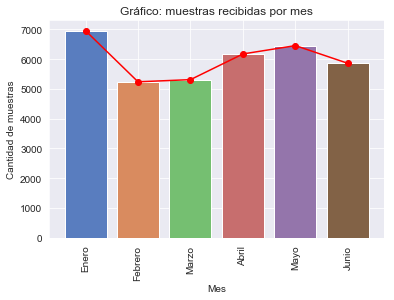

In [0]:
year = ['Enero','Febrero','Marzo','Abril','Mayo','Junio','Julio','Agosto','Septiembre','Octubre','Noviembre','Diciembre']
sns.set_style('dark') #darkgrid, whitegrid, dark, white
sns.set_palette(palette='muted',n_colors=15) #deep, muted, bright, pastel, dark, colorblind
plt.xticks(rotation=90)
sns.countplot(data['Mes'])
plt.plot(data['Mes'].value_counts().to_frame().reindex(rango_mes),'ro-')
plt.ylabel('Cantidad de muestras')
plt.title('Gráfico: muestras recibidas por mes')
plt.grid(True)
plt.savefig(ruta_graficos+'cantidad de muestras.png')
plt.show()

In [0]:
conteo_mensual = pd.DataFrame(data['Mes'].value_counts()) 
conteo_mensual.columns = ['conteo']
conteo_mensual.to_csv(ruta_output+'conteo de muestras por mes.csv')
conteo_mensual

In [0]:
minim=data['Mes'].value_counts().min()
maxim=data['Mes'].value_counts().max()
mes_min=conteo_mensual[(conteo_mensual['conteo']==minim)].index.tolist()[0]
mes_max=conteo_mensual[(conteo_mensual['conteo']==maxim)].index.tolist()[0]

print('El mes con menor número de muestras recibidas es {} para un total de {}'
      .format(mes_min,minim))
print('El mes con mayor número de muestras recibidas es {} para un total de {}'
      .format(mes_max,maxim))
print('Promedio mensual de muestras recibidas:',round(data['Mes'].value_counts().mean(),0))
print('Promedio diario de muestras recibidas:',round(data['Mes'].count() / data['Fecha Recibida'].value_counts().shape[0],0))

Volver al [Indice](#indice)

<a id='transito'></a>
***Tiempo de tránsito de las muestras***

In [0]:
data.describe()['Tiempo de Transito']

count    35958.000000
mean        24.036320
std        938.369151
min          0.000000
25%          1.000000
50%          3.000000
75%          5.000000
max      43242.000000
Name: Tiempo de Transito, dtype: float64

In [0]:
TiempoTransito = data[(data['Tiempo de Transito']>=0)&
                      (data['Tiempo de Transito']<=15)]['Tiempo de Transito']

print('\nAnálisis Estadístico Descriptivo')
print('--------------------------------\n')
print('El total de muestras incluidas en conteo:', TiempoTransito.count(),'\n')
print('El valor máximo de Tiempo de Tránsito es:', TiempoTransito.max(),'\n')
print('El valor mínimo de Tiempo de Tránsito es:', TiempoTransito.min(),'\n')
print('La media de Tiempo de Tránsito es: ',round(TiempoTransito.mean(),2),'\n')
print('La desviación estándar de Tiempo de Tránsito es:',round(TiempoTransito.std(),2),'\n')
print('La mediana de Tiempo de Tránsito es:',TiempoTransito.median(),'\n')
print('La moda de Tiempo de Tránsito es:',TiempoTransito.mode()[0],'\n')
print('Los percentiles de la variable [Tiempo de Tránsito] de las muestras se listan a continuación:')
percentil=TiempoTransito.quantile([.25,.50,.75,.90,.95,.995]).to_frame()
percentil.columns = ['días']
percentil.index = (percentil.index*100).astype(str)+'%'
percentil.to_csv(ruta_output+'percentiles tiempo de transito.csv')
percentil

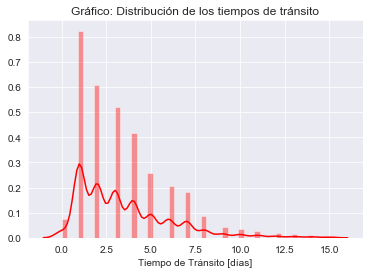

In [0]:
sns.set_style('dark') #darkgrid, whitegrid, dark, white
sns.distplot(TiempoTransito,kde=True,color='red')
plt.title('Gráfico: Distribución de los tiempos de tránsito')
plt.xlabel('Tiempo de Tránsito [días]')
plt.grid(True)
plt.savefig(ruta_graficos+'distribucion tiempos transito.png')
plt.show()

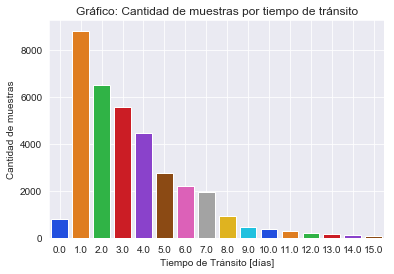

In [0]:
sns.set_style('dark') #darkgrid, whitegrid, dark, white
sns.set_palette(palette='bright',n_colors=18) #deep, muted, bright, pastel, dark, colorblind
sns.countplot(TiempoTransito,)
plt.title('Gráfico: Cantidad de muestras por tiempo de tránsito')
plt.ylabel('Cantidad de muestras')
plt.xlabel('Tiempo de Tránsito [días]')
plt.grid(True)
plt.savefig(ruta_graficos+'conteo por tiempo transito.png')
plt.show()

In [0]:
distr=TiempoTransito.value_counts().to_frame()
distr.columns=['conteo']
distr['%'] = round(TiempoTransito.value_counts(normalize=True)*100,1)
distr.to_csv(ruta_output+'distribucion tiempo transito.csv')
distr

In [0]:
rango1 = data[(data['Tiempo de Transito']>=0) & 
            (data['Tiempo de Transito']<=1)]['Tiempo de Transito'].count()

rango2 = data[(data['Tiempo de Transito']>1) & 
              (data['Tiempo de Transito']<=5)]['Tiempo de Transito'].count()

rango3 = data[(data['Tiempo de Transito']>5) & 
              (df['Tiempo de Transito']<=15)]['Tiempo de Transito'].count()

rango4 = data[(data['Tiempo de Transito']>15) & 
              (df['Tiempo de Transito']<=30)]['Tiempo de Transito'].count()

rango5 = data[(data['Tiempo de Transito']>30)]['Tiempo de Transito'].count()

total = data['Tiempo de Transito'].count()

tiemTran = pd.Series(data=rango1,index = ['0 a 1'])
tiemTran = tiemTran.append(pd.Series(data = rango2,index = ['2 a 5']))
tiemTran = tiemTran.append(pd.Series(data = rango3,index = ['6 a 15']))
tiemTran = tiemTran.append(pd.Series(data = rango4,index = ['16 a 30']))
tiemTran = tiemTran.append(pd.Series(data = rango5,index = ['> a 30']))
tiemTran = tiemTran.append(pd.Series(data = total,index = ['Total']))

tiemTran = pd.DataFrame(tiemTran)
tiemTran.columns = ['conteo']
tiemTran['%'] = round(tiemTran['conteo']/tiemTran['conteo']['Total']*100,1)
tiemTran.to_csv(ruta_output+'segmentacion tiempo transito.csv')
tiemTran

In [0]:
tTran=data[(data['Tiempo de Transito']>15)|
           (data['Tiempo de Transito']<0)]['Tiempo de Transito'].value_counts().to_frame()
tTran.columns = ['conteo']
tTran.to_csv(ruta_output+'tiempos transito mayor a 15 dias.csv')
tTran

In [0]:
listaMuestras=data[(data['Tiempo de Transito']>15)|
                   (data['Tiempo de Transito']<0)]['Muestra'].to_frame()
listaMuestras['Fecha']=data[(data['Tiempo de Transito']>15)|
                               (data['Tiempo de Transito']<0)]['Fecha Recibida']
listaMuestras['Transito']=data[(data['Tiempo de Transito']>15)|
                               (data['Tiempo de Transito']<0)]['Tiempo de Transito']
listaMuestras.set_index(['Muestra','Fecha','Transito'],inplace=True,)
listaMuestras.to_csv(ruta_output+'lista muestras tiempo transito.csv')
listaMuestras

Volver al [Indice](#indice)

<a id='ingreso'></a>
***Por vía de ingreso***

In [0]:
viaIngr = pd.DataFrame(data[(data['Tiempo de Transito']<=365)]['VIA DE INGRESO'].value_counts())
viaIngr.columns = ['conteo']
viaIngr['%']=round(data[(data['Tiempo de Transito']<=365)]['VIA DE INGRESO'].value_counts(normalize=True)*100,1)

prom = []
for via in viaIngr.index:
    prom.append(round(data[(data['VIA DE INGRESO'] == via) & 
                           (data['Tiempo de Transito']<=365)]['Tiempo de Transito'].mean(),1))

viaIngr['t prom'] = prom
prom = []

for via in viaIngr.index:
    prom.append(round(data[(data['VIA DE INGRESO'] == via) & 
                           (data['Edad de Toma']<=30)&
                           (data['Edad de Toma']>=0)]['Edad de Toma'].mean(),1))

viaIngr['e prom'] = prom
viaIngr.to_csv(ruta_output+'conteo por via ingreso.csv')
viaIngr

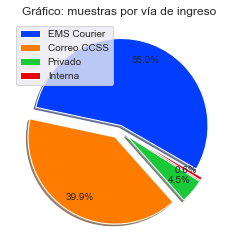

In [0]:
plt.pie(data['VIA DE INGRESO'].value_counts(),
        autopct='%1.1f%%', shadow=True,startangle=330,
        explode=(0.05,0.1,0.1,0.1),pctdistance=0.8)
plt.legend(labels=viaIngr.index.tolist(), loc=2)
plt.title('Gráfico: muestras por vía de ingreso')
plt.savefig(ruta_graficos+'muestras por via ingreso.png')
plt.show()

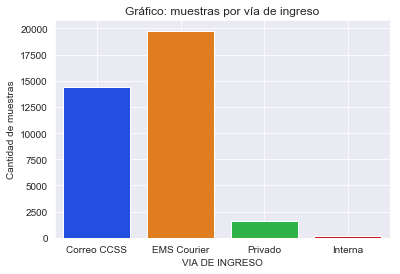

In [0]:
sns.countplot(data['VIA DE INGRESO'])
plt.title('Gráfico: muestras por vía de ingreso')
plt.ylabel('Cantidad de muestras')
plt.grid(True)
plt.savefig(ruta_graficos+'conteo por via ingreso.png')
plt.show()

Volver al [Indice](#indice)

<a id='centro'></a>
***Por tipo de centro***

In [0]:
cant=[]
for categ in data['CATEGORIA'].value_counts().index:
    cant.append(data[(data['CATEGORIA'] == categ)]['Centro de Recolección'].unique().shape[0])

Centro = pd.DataFrame(data['CATEGORIA'].value_counts())
Centro.columns=['# muestras']
Centro['%']=round(data['CATEGORIA'].value_counts(normalize=True)*100,1)
Centro['# centros']=cant

inadec = []
for categ in data['CATEGORIA'].value_counts().index:
    inadec.append(round(data[(data['CATEGORIA'] == categ) & 
                             (data['CLASSIFICATION']=='Inadecuada')]['CLASSIFICATION'].count()))
Centro['# insat'] = inadec

inadec = []
for categ in data['CATEGORIA'].value_counts().index:
    inadec.append(round(data[(data['CATEGORIA'] == categ) & 
                             (data['CLASSIFICATION']=='Inadecuada')]['CLASSIFICATION'].count()/data[(data['CATEGORIA'] == categ)]['CLASSIFICATION'].count()*100,1))
Centro['% insat'] = inadec
                  
prom = []
for categ in df['CATEGORIA'].value_counts().index:
    prom.append(round(data[(data['CATEGORIA'] == categ) & 
                         (data['Tiempo de Transito']<=365)]['Tiempo de Transito'].mean(),1))
Centro['t_prom'] = prom
prom = []
for categ in data['CATEGORIA'].value_counts().index:
    prom.append(round(data[(data['CATEGORIA'] == categ) & 
                         (data['Edad de Toma']<=30) &
                         (data['Edad de Toma']>=0)]['Edad de Toma'].mean(),1))
Centro['e_prom'] = prom
Centro.to_csv(ruta_output+'segmentacion por centro.csv',encoding='utf-16')
Centro

Volver al [Indice](#indice)

<a id='region'></a>
***Por región***

In [0]:
Region = pd.DataFrame(data['REGION'].value_counts())
Region.columns=['# muestras']
Region['% muestras']=round(data['REGION'].value_counts(normalize=True)*100,1)
insat = []
for region in data['REGION'].value_counts().index:
    insat.append(round(data[(data['REGION'] == region) & 
                          (data['CLASSIFICATION']=='Inadecuada')]['CLASSIFICATION'].count(),1))
Region['# insatisf'] = insat
insat = []
for region in data['REGION'].value_counts().index:
    insat.append(round(data[(data['REGION'] == region) & 
                          (data['CLASSIFICATION']=='Inadecuada')]['CLASSIFICATION'].count()/data[(data['REGION'] == region)]['CLASSIFICATION'].count()*100,1))
Region['% insat'] = insat
prom = []
for region in data['REGION'].value_counts().index:
    prom.append(round(data[(data['REGION'] == region) & 
                           (data['Tiempo de Transito']<=365)]['Tiempo de Transito'].mean(),1))
Region['t_prom'] = prom
prom = []
for region in data['REGION'].value_counts().index:
    prom.append(round(data[(data['REGION'] == region) & 
                           (data['Edad de Toma']<=30) &
                           (data['Edad de Toma']>=0)]['Tiempo de Transito'].mean(),1))
Region['e_prom'] = prom
Region.to_csv(ruta_output+'segmentacion por region.csv',encoding='utf-16')
Region

Volver al [Indice](#indice)

<a id='primeras'></a>
***Edad de toma de muestras (primeras muestras)***

In [0]:
edad_Prim = data[(data['Edad de Toma']>=0)&
              (data['Edad de Toma']<=30)&
              ((data['SUB_CLASSIFICATION']=='Perfil Completo')|
              (data['SUB_CLASSIFICATION']=='Recuperada'))]['Edad de Toma'].dropna()

print('\nAnálisis Estadístico Descriptivo')
print('--------------------------------\n')
print('El total de muestras utilizadas:', edad_Prim.count(),'\n')
print('El valor máximo de Edad de Toma es:', edad_Prim.max(),'\n')
print('El valor mínimo de Edad de Toma es:', edad_Prim.min(),'\n')
print('La media de la Edad de Toma es: ',round(edad_Prim.mean(),2),'\n')
print('La desviación estándar de la Edad de Toma es:',round(edad_Prim.std(),2),'\n')
print('La mediana de la Edad de Toma es:',edad_Prim.median(),'\n')
print('La moda de la Edad de Toma es:',edad_Prim.mode()[0],'\n')
print('Los percentiles de la variable [Edad de Toma] de las muestras se listan a continuación:')
percentil=edad_Prim.quantile([.25,.50,.75,.90,.95,.995]).to_frame()
percentil.columns = ['']
percentil.index = (percentil.index*100).astype(str)+'%'
percentil.to_csv(ruta_output+'percentiles edad toma primeras muestras.csv')
percentil

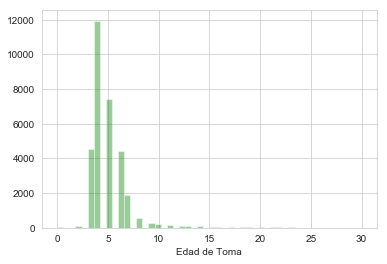

In [0]:
sns.set_style('whitegrid')
sns.distplot(edad_Prim,kde=False,color='green')
plt.show()

In [0]:
prim = data[((data['SUB_CLASSIFICATION']=='Perfil Completo')|
                 (data['SUB_CLASSIFICATION']=='Recuperada'))]

rango1=prim[(prim['Edad de Toma']>=0) & (prim['Edad de Toma']<=2)]['Edad de Toma'].count()
rango2=prim[(prim['Edad de Toma']>=3) & (prim['Edad de Toma']<=4)]['Edad de Toma'].count()
rango3=prim[(prim['Edad de Toma']>=5) & (prim['Edad de Toma']<=7)]['Edad de Toma'].count()
rango4=prim[(prim['Edad de Toma']>=8) & (prim['Edad de Toma']<=15)]['Edad de Toma'].count()
rango5=prim[(prim['Edad de Toma']>=16) & (prim['Edad de Toma']<=30)]['Edad de Toma'].count()
rango6=prim[(prim['Edad de Toma']>30)]['Edad de Toma'].count()
total=prim['Edad de Toma'].count()

EdadToma=pd.Series(data=rango1,index = ['0 a 2 días'])
EdadToma=EdadToma.append(pd.Series(data=rango2,index = ['3 a 4 días']))
EdadToma=EdadToma.append(pd.Series(data=rango3,index = ['5 a 7 días']))
EdadToma=EdadToma.append(pd.Series(data=rango4,index = ['8 a 15 días']))
EdadToma=EdadToma.append(pd.Series(data=rango5,index = ['16 a 30 días']))
EdadToma=EdadToma.append(pd.Series(data=rango6,index = ['> a 30 días']))
EdadToma=EdadToma.append(pd.Series(data=total,index = ['Total']))
EdadToma = pd.DataFrame(EdadToma)
EdadToma.columns=['conteo']
EdadToma['%']= round(EdadToma['conteo']/EdadToma['conteo']['Total']*100,2)

porcentaje = 0
for porcent in EdadToma['%'][0:3]:
    porcentaje = porcentaje + porcent
porcentaje = round(porcentaje,2)   
print('\nHasta los 7 días de nacidos se ha tamizado el:',str(porcentaje),'% del total de muestras\n')

print('Total de muestras de primera toma:',total,'\n')

EdadToma.to_csv(ruta_output+'segmentación edad primera muestra.csv')
EdadToma


Volver al [Indice](#indice)

<a id='segundas'></a>
***Edad de toma de muestras (segundas muestras)***

In [0]:
rango=[]
for num in range(400,442,1):
    rango.append(str(num))
for num in range(445,500,1):
    rango.append(str(num))
rango

seg_muestra=data[(data['WARNCODE'].str[:3].isin(rango))&
                 (data['Edad de Toma']>=0)&
                 (data['Edad de Toma']<=365)]['WARNCODE'].value_counts().to_frame()
seg_muestra.columns=['conteo']
seg_muestra.to_csv(ruta_output+'conteo de segundas muestras.csv')
seg_muestra

In [0]:
edad_Seg = data[(data['WARNCODE'].str[:3].isin(rango))&
                (data['Edad de Toma']>=0)&
                (data['Edad de Toma']<=365)]['Edad de Toma']

print('\nAnálisis Estadístico Descriptivo')
print('--------------------------------\n')
print('El total de muestras utilizadas:', edad_Seg.count(),'\n')
print('El valor máximo de Edad de Toma es:', edad_Seg.max(),'\n')
print('El valor mínimo de Edad de Toma es:', edad_Seg.min(),'\n')
print('La media de la Edad de Toma es: ',round(edad_Seg.mean(),2),'\n')
print('La desviación estándar de la Edad de Toma es:',round(edad_Seg.std(),2),'\n')
print('La mediana de la Edad de Toma es:',edad_Seg.median(),'\n')
print('La moda de la Edad de Toma es:',edad_Seg.mode()[0],'\n')
print('Los percentiles de la variable [Edad de Toma] de las muestras se listan a continuación:')
percentil=edad_Seg.quantile([.25,.50,.75,.90,.95,.995]).to_frame()
percentil.columns = ['']
percentil.index = (percentil.index*100).astype(str)+'%'
percentil.to_csv(ruta_output+'percentiles edad toma segundas muestras.csv')
percentil

Volver al [Indice](#indice)

<a id='insatisf'></a>
***Muestras insatisfactorias y su criterio de selección***

In [0]:
defecto = ['101','102','103','104','105','201','202','203','204','205','206','207','214','216']
total_insatisfactorias = data[data['WARNCODE'].str[0:3].isin(defecto)]['WARNCODE'].value_counts().sum()
print()
print('El total de muestras insatisfactorias es de:',total_insatisfactorias)
total_recibidas = data['Fecha Recibida'].count()
porcent_insatisf = round(total_insatisfactorias/total_recibidas*100,2)
print('Esto corresponde a: ' + str(porcent_insatisf) + ' % del total recibido de ' + str(total_recibidas) + ' muestras')
Insatisf = pd.DataFrame(data[data['WARNCODE'].str[0:3].isin(defecto)]['WARNCODE'].value_counts())
Insatisf.columns = ['muestras']
Insatisf['%'] = round(Insatisf['muestras']/total_insatisfactorias*100,1)
Insatisf.to_csv(ruta_output+'muestras insatisf y criterio.csv',encoding='utf-16')
Insatisf

Volver al [Indice](#indice)

<a id='prod_lab'></a>
***Producción del laboratorio***

In [0]:
year = ['Enero','Febrero','Marzo','Abril','Mayo','Junio','Julio',
        'Agosto','Septiembre','Octubre','Noviembre','Diciembre']
totalizado = []

ConteoP = pd.DataFrame(data['MES'].value_counts())
ConteoP.columns = ['Total']

for prueba in data['PRUEBA'].value_counts().index.tolist():
    ConteoP[prueba] = (data[data['PRUEBA'] == prueba]['MES'].value_counts())

ConteoP.rename(columns={'Aminoacidos y Acilcarnitinas': 'AAC', 
                        'Galactosa Total': 'GAL',
                        '17-OHP': '17OHP',
                        'Hemoglobinas Totales': 'HBs', 
                        'TSH Neonatal': 'TSH'}, inplace=True)

ConteoP=ConteoP.reindex(year)

for columna in ConteoP.columns:
    totalizado.append(ConteoP[columna].sum())
    
ConteoP.loc['TOTAL'] = totalizado

ConteoP.to_csv(ruta_output+'produccion laboratorio.csv')
ConteoP

In [0]:
td = (df['FECHA_HORA_APROBADA']-df['FECHA_HORA_RECIBIDA']).mean()
print('\nEl tiempo promedio de proceso total de muestras es de:',tiempo_prom(td),'horas')
dias=td.components.days
horas=td.components.hours
minutos=td.components.minutes
segundos=td.components.seconds
print('Esto es {} día, {} horas, {} minutos, {} segundos\n'.format(dias,horas,minutos,segundos))

In [0]:
T_Prom = data[(data['REPETICION']=='N')]['PRUEBA'].value_counts().to_frame()
T_Prom.columns=['Cantidad']
tprom=[]
for prueba in data['PRUEBA'].value_counts().index.tolist():
    tprom.append(tiempo_prom((data[(data['PRUEBA']== prueba)&(data['REPETICION']=='N')]['FECHA_HORA_APROBADA']-
                                    data[(data['PRUEBA']== prueba)&(data['REPETICION']=='N')]['FECHA_HORA_RECIBIDA']).mean()))
T_Prom['Tiempo']=tprom
T_Prom.to_csv(ruta_output+'tiempo promedio proceso pruebas.csv')
T_Prom

Volver al [Indice](#indice)

<a id='analisis'></a>
***Análisis de tiempos de digitación***

In [0]:
data.columns.tolist()

In [0]:
data['Evento'].value_counts()

In [0]:
# preparación de los sets de datos para análisis

data.drop(['Segundo Data','Fecha','Hora'], axis=1, inplace=True)

df_Login = data[data['Evento']=='Login']
df_IDE1 = data[data['Evento']=='InicioDataEntry1']
df_IDE2 = data[data['Evento']=='InicioDataEntry2']
df_FDE2 = data[data['Evento']=='FinDataEntry2']

df_Login.columns = ['Evento_Login', 'Num Muestra', 'Usuario_Login', 'Fecha_Hora_Login']
df_IDE1.columns = ['Evento_IDE1', 'Num Muestra', 'Usuario_IDE1', 'Fecha_Hora_IDE1']
df_IDE2.columns = ['Evento_IDE2', 'Num Muestra', 'Usuario_IDE2', 'Fecha_Hora_IDE2']
df_FDE2.columns = ['Evento_FDE2', 'Num Muestra', 'Usuario_FDE2', 'Fecha_Hora_FDE2']

In [0]:
# combinando las tablas respecto al número de muestra

df_Login_FDE2 = pd.merge(df_Login, df_FDE2, how='inner', on=['Num Muestra'])
df_Login_FDE2.drop(['Evento_Login','Evento_FDE2'], axis=1, inplace=True)

df_IDE1_FDE2 = pd.merge(df_IDE1, df_FDE2, how='inner', on=['Num Muestra'])
df_IDE1_FDE2.drop(['Evento_IDE1','Evento_FDE2'], axis=1, inplace=True)

df_IDE2_FDE2 = pd.merge(df_IDE2, df_FDE2, how='inner', on=['Num Muestra'])
df_IDE2_FDE2.drop(['Evento_IDE2','Evento_FDE2'], axis=1, inplace=True)


In [0]:
# buscando valores negativos en la resta de los campos fecha hora
df_Login_FDE2[df_Login_FDE2['Fecha_Hora_Login']>df_Login_FDE2['Fecha_Hora_FDE2']]

In [0]:
# cálculos para análisis de tiempo de digitación entre Login y FinDataEntry2

df_Login_FDE2['Fecha_Hora_Login'] = df_Login_FDE2['Fecha_Hora_Login'].apply(pd.to_datetime)
df_Login_FDE2['Fecha_Hora_FDE2'] = df_Login_FDE2['Fecha_Hora_FDE2'].apply(pd.to_datetime)
df_Login_FDE2['Tiempo'] = df_Login_FDE2['Fecha_Hora_FDE2']-df_Login_FDE2['Fecha_Hora_Login']

tprom = df_Login_FDE2['Tiempo'].mean()
dia=tprom.components.days
hors=tprom.components.hours
mins=tprom.components.minutes
segs=tprom.components.seconds
print('\nEl tiempo promedio de proceso es', tiempo_prom(tprom),'horas') # acá usamos la función tiempo_prom()
print('Esto es: {} días, {} horas, {} minutos y {} segundos'.format(dia,hors,mins,segs))

df_Login_FDE2.to_csv(ruta_output+'Tiempo de proceso.csv')
df_Login_FDE2.head()

In [0]:
# cálculos para análisis de tiempo de digitación entre InicioDataEntry1 y FinDataEntry2
# convirtiendo campos en fecha_hora
df_IDE1_FDE2['Fecha_Hora_IDE1'] = df_IDE1_FDE2['Fecha_Hora_IDE1'].apply(pd.to_datetime)
df_IDE1_FDE2['Fecha_Hora_FDE2'] = df_IDE1_FDE2['Fecha_Hora_FDE2'].apply(pd.to_datetime)

In [0]:
# buscando valores negativos en la resta de los campos fecha hora
tmp=df_IDE1_FDE2[df_IDE1_FDE2['Fecha_Hora_IDE1']>df_IDE1_FDE2['Fecha_Hora_FDE2']]
tmp.to_csv(ruta_output+'listado errores IDE1 FDE2.csv')
tmp

In [0]:
# hace los cálculos de tiempo promedio
df_IDE1_FDE2=df_IDE1_FDE2[df_IDE1_FDE2['Fecha_Hora_IDE1']<df_IDE1_FDE2['Fecha_Hora_FDE2']]

df_IDE1_FDE2['Tiempo'] = df_IDE1_FDE2['Fecha_Hora_FDE2']-df_IDE1_FDE2['Fecha_Hora_IDE1']
df_IDE1_FDE2['Dupla'] = df_IDE1_FDE2['Usuario_IDE1'] + ' - ' + df_IDE1_FDE2['Usuario_FDE2']

tprom = df_IDE1_FDE2['Tiempo'].mean()
dia=tprom.components.days
hors=tprom.components.hours
mins=tprom.components.minutes
segs=tprom.components.seconds
print('\nEl tiempo promedio de proceso IDE1 - FDE2 es', tiempo_prom(tprom),'horas') # acá usamos la función tiempo_prom()
print('Esto es: {} días, {} horas, {} minutos y {} segundos'.format(dia,hors,mins,segs))

df_IDE1_FDE2.to_csv(ruta_output+'Tiempo de digitacion IDE1 FDE2.csv')
df_IDE1_FDE2.head()


In [0]:
# para calcular el tiempo promedio por duplas de usuarios

tabla = df_IDE1_FDE2['Dupla'].value_counts().to_frame()
tabla.columns = ['Cantidad']
prom = []
long_prom = []
for dupla in tabla.index:
    tprom=df_IDE1_FDE2[df_IDE1_FDE2['Dupla']==dupla]['Tiempo'].mean()
    prom.append(tiempo_prom(tprom))
    long_prom.append('{}d,{}h,{}m,{}s'.format(tprom.components.days,tprom.components.hours,tprom.components.minutes,tprom.components.seconds))
tabla['Promedio'] = prom
tabla['Prom. extendido'] = long_prom
tabla.to_csv(ruta_output+'promedios por duplas IDE1 FDE2.csv')
tabla

In [0]:
# cálculos para análisis de tiempo de digitación entre InicioDataEntry2 y FinDataEntry2
# convirtiendo campos a fecha hora

df_IDE2_FDE2['Fecha_Hora_IDE2'] = df_IDE2_FDE2['Fecha_Hora_IDE2'].apply(pd.to_datetime)
df_IDE2_FDE2['Fecha_Hora_FDE2'] = df_IDE2_FDE2['Fecha_Hora_FDE2'].apply(pd.to_datetime)


In [0]:
# buscando valores negativos en la resta de los campos fecha hora
tmp = df_IDE2_FDE2[df_IDE2_FDE2['Fecha_Hora_IDE2']>df_IDE2_FDE2['Fecha_Hora_FDE2']]
tmp.to_csv(ruta_output+'listado errores IDE2 FDE2.csv')
tmp

In [0]:
# haciendo los cálculos

df_IDE2_FDE2=df_IDE2_FDE2[df_IDE2_FDE2['Fecha_Hora_IDE2']<df_IDE2_FDE2['Fecha_Hora_FDE2']]

df_IDE2_FDE2['Tiempo'] = df_IDE2_FDE2['Fecha_Hora_FDE2']-df_IDE2_FDE2['Fecha_Hora_IDE2']

df_IDE2_FDE2['Usuario'] = df_IDE2_FDE2['Usuario_IDE2']

df_IDE2_FDE2['Usuario'] = np.where(df_IDE2_FDE2['Usuario_IDE2']==df_IDE2_FDE2['Usuario_FDE2'],
                                   df_IDE2_FDE2['Usuario'],
                                   df_IDE2_FDE2['Usuario_IDE2'] + ' - ' + df_IDE2_FDE2['Usuario_FDE2'])

tprom = df_IDE2_FDE2['Tiempo'].mean()
dia=tprom.components.days
hors=tprom.components.hours
mins=tprom.components.minutes
segs=tprom.components.seconds
print('\nEl tiempo promedio de proceso IDE2 - FDE2 es', tiempo_prom(tprom),'horas') # acá usamos la función tiempo_prom()
print('Esto es: {} días, {} horas, {} minutos y {} segundos'.format(dia,hors,mins,segs))

df_IDE2_FDE2.to_csv(ruta_output+'Tiempo de digitacion IDE2 FDE2.csv')
df_IDE2_FDE2.head()


In [0]:
# para calcular el tiempo promedio por usuarios o duplas de usuarios

tabla = df_IDE2_FDE2['Usuario'].value_counts().to_frame()
tabla.columns = ['Cantidad']
prom = []
long_prom = []
for user in tabla.index:
    tprom=df_IDE2_FDE2[df_IDE2_FDE2['Usuario']==user]['Tiempo'].mean()
    prom.append(tiempo_prom(tprom))
    long_prom.append('{}d,{}h,{}m,{}s'.format(tprom.components.days,tprom.components.hours,tprom.components.minutes,tprom.components.seconds))
tabla['Promedio'] = prom
tabla['Prom. extendido'] = long_prom
tabla.to_csv(ruta_output+'promedios por usuarios IDE2 FDE2.csv')
tabla

Volver al [Indice](#indice)

<a id='cobertura'></a>
***Cobertura del programa y muestras insatisfactorias***

In [0]:
# Para gráficos de cobertura y muestras insatisfactorias
# Antes de proceder, actualizar los archivos 'cobertura.csv' e 'insatisfactorias.csv' 
# de la carpeta DATA con los últimos valores disponibles, luego ejecutar esta celda

cob = pd.read_csv(ruta_data+'cobertura.csv')
ins = pd.read_csv(ruta_data+'insatisfactorias.csv' )

In [0]:
cob

In [0]:
ins

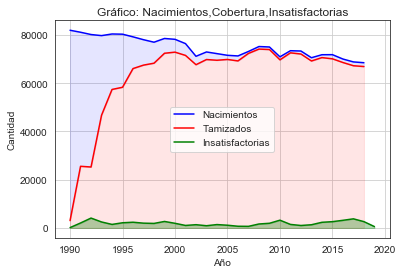

In [0]:
sns.set_style('white')
plt.xticks(rotation=0)
plt.plot(cob['AÑO'],cob['NACIMIENTOS'],'b-')
plt.plot(cob['AÑO'],cob['TAMIZADOS'],'r-')
plt.plot(ins['Año'],ins['Insatisfactorias'],'g-')
plt.fill_between(cob['AÑO'],cob['NACIMIENTOS'],cob['TAMIZADOS'],color='blue',alpha=0.1)
plt.fill_between(cob['AÑO'],cob['TAMIZADOS'],color = 'red',alpha=0.1)
plt.fill_between(ins['Año'],ins['Insatisfactorias'],color = 'green',alpha=0.3)
plt.title('Gráfico: Nacimientos,Cobertura,Insatisfactorias')
plt.xlabel('Año')
plt.ylabel('Cantidad')
plt.legend(['Nacimientos','Tamizados','Insatisfactorias'],loc='center')
plt.grid(True)
plt.savefig(ruta_graficos+'nacim cobert insatisf.png')
plt.show()

Volver al [Indice](#indice)

### 5. Otros datos administrativos

<a id='centros'></a>
***Estadísticas por centros***

In [0]:
data['CLASSIFICATION'].value_counts()

In [0]:
round(data['CLASSIFICATION'].value_counts(normalize=True)*100,2)

In [0]:
data['Centro de Recolección'].value_counts().head()

In [0]:
for centro in data['Centro de Recolección'].value_counts().index:
    print(centro + ' >>> Totalizado\n',data[(data['Centro de Recolección']==centro)]['CLASSIFICATION'].value_counts())
    print(centro + ' >>> Porcentual\n',round(data[(data['Centro de Recolección']==centro)]['CLASSIFICATION'].value_counts(normalize=True)*100,2))
    print()

In [0]:
# para cálculo del valor IDI por Centros

IDI_ind=data['IDCentro'].value_counts().to_frame()
IDI_ind.columns=['# muestras']
regiones=[]
for centro in IDI_ind.index:
    regiones.append((data[(data['IDCentro']==centro)]['REGION'].unique().tolist()[0]))
IDI_ind['Region']=regiones
tipo=[]
for centro in IDI_ind.index:
    tipo.append(data[(data['IDCentro']==centro)]['CATEGORIA'].unique().tolist()[0])
IDI_ind['Tipo Centro']=tipo

cod=[]
for centro in IDI_ind.index:
    cod.append(data[(data['IDCentro']==centro)]['Centro de Recolección'].unique().tolist()[0])
IDI_ind['Centro']=cod

inad=[]
for centro in IDI_ind.index:
    inad.append(data[(data['CLASSIFICATION']=='Inadecuada')&
                     (data['IDCentro']==centro)]['CLASSIFICATION'].value_counts().sum())
IDI_ind['# inad.']=inad
IDI_ind['% inad.']=round(IDI_ind['# inad.']/IDI_ind['# muestras']*100,2)

ttran=[]
for centro in IDI_ind.index:
    ttran.append(round(data[(data['IDCentro']==centro)&
                            (data['Tiempo de Transito']>=0)&
                            (data['Tiempo de Transito']<=15)]['Tiempo de Transito'].mean(),1))
IDI_ind['tiempo trans.']=ttran

edprom=[]
for centro in IDI_ind.index:
    edprom.append(round(data[(data['IDCentro']==centro)&
                            (data['Edad de Toma']>=0)&
                            (data['Edad de Toma']<=15)]['Edad de Toma'].mean(),1))
IDI_ind['edad prom.']=edprom

dia_lab = data['Fecha Recibida'].unique().size

IDI_ind['IDI']=round((IDI_ind['# muestras']/dia_lab)*IDI_ind['% inad.'],2)
IDI_ind=IDI_ind.sort_values('IDI',ascending=False)
IDI_ind.to_csv(ruta_output+'IDI individual por centro.csv',encoding='utf-16')

IDI_ind

In [0]:
# para sacar el listado de los codigos de area de salud

AS=data[data['CATEGORIA']=='Area de Salud']
cod = AS['IDCentro'].str[:3].value_counts().index.tolist()
print(cod)

['123', '309', '602', '619', '107', '609', '111', '501', '101', '617', '805', '611', '114', '129', '806', '303', '115', '614', '804', '119', '306', '304', '807', '810', '603', '618', '110', '104', '118', '102', '808', '612', '207', '122', '624', '803', '616', '302', '206', '113', '125', '310', '301', '121', '116', '605', '103', '601', '802', '816', '106', '117', '204', '613', '408', '112', '615', '313', '811', '621', '305', '201', '604', '205', '124', '817', '504', '626', '108', '623', '120', '127', '407', '406', '209', '109', '404', '403', '622', '503', '126', '405', '401', '607', '505', '502', '627', '809', '610', '409', '308', '202', '105', '625', '311', '128', '506', '203']


In [0]:
# por si se quiere hacer una búsqueda individual de un código en particular
data[((data['CATEGORIA']=='Area de Salud')|(data['CATEGORIA']=='EBAIS'))&
      (data['IDCentro'].str[:3]=='619')]['Centro de Recolección'].value_counts()

In [0]:
# sacar el IDI por la suma de areas de salud y ebais

total_AS=[]
nom_AS=[]

for codigo in set(cod):
    total_AS.append(data[((data['CATEGORIA']=='Area de Salud')|(data['CATEGORIA']=='EBAIS'))&
      (data['IDCentro'].str[:3]==codigo)]['Centro de Recolección'].count())

for codigo in set(cod):
    nom_AS.append(codigo)

AreaSalud = pd.Series(nom_AS).to_frame()
AreaSalud.columns = ['codigo']
AreaSalud['muestras']=total_AS


region=[]
for codigo in set(cod):
    region.append(data[((data['CATEGORIA']=='Area de Salud')|(data['CATEGORIA']=='EBAIS'))&
                        (data['IDCentro'].str[:3]==codigo)]['REGION'].unique().tolist()[0])
AreaSalud['Region']=region

centro=[]
for codigo in set(cod):
    centro.append(data[(data['CATEGORIA']=='Area de Salud')&
                       (data['IDCentro'].str[:3]==codigo)]['Centro de Recolección'].unique().tolist()[0])
AreaSalud['Area Salud']=centro

inadec=[]

for codigo in set(cod):
    inadec.append(data[((data['CATEGORIA']=='Area de Salud')|(data['CATEGORIA']=='EBAIS'))&
                       (data['IDCentro'].str[:3]==codigo)&
                       (data['CLASSIFICATION']=='Inadecuada')]['CLASSIFICATION'].value_counts().sum())

AreaSalud['# inad.']=inadec
AreaSalud['% inad.']=round(AreaSalud['# inad.']/AreaSalud['muestras']*100,2)

ttran=[]
for codigo in set(cod):
    ttran.append(round(data[((data['CATEGORIA']=='Area de Salud')|(data['CATEGORIA']=='EBAIS'))&
                             (data['IDCentro'].str[:3]==codigo)&
                             (data['Tiempo de Transito']>=0)&
                             (data['Tiempo de Transito']<=15)]['Tiempo de Transito'].mean(),1))
AreaSalud['trans.']=ttran

edprom=[]
for codigo in set(cod):
    edprom.append(round(data[((data['CATEGORIA']=='Area de Salud')|(data['CATEGORIA']=='EBAIS'))&
                              (data['IDCentro'].str[:3]==codigo)&
                              (data['Edad de Toma']>=0)&
                              (data['Edad de Toma']<=30)]['Edad de Toma'].mean(),1))
AreaSalud['edad prom.']=edprom

dia_lab = data['Fecha Recibida'].unique().size

AreaSalud['IDI'] = round((AreaSalud['muestras']/dia_lab)*AreaSalud['% inad.'],2)
AreaSalud=AreaSalud.sort_values('IDI',ascending=False)
AreaSalud.to_csv(ruta_output+'IDI por Area de Salud.csv',index=False,encoding='utf-16')
AreaSalud


Volver al [Indice](#indice)

<a id='varias'></a>
***Estadísticas varias***

<a id='madre'></a>
***Edad de la madre al nacer el bebé***

In [0]:
# Para hacer cálculos con la edad de la madre asegurarse 
# de cargar los archivos de datos en formato EXCEL

if tipoArchivo == 'EXCEL':
    data['Año Nacimiento Madre'] = data['Fecha Nacimiento Madre'].astype(str).str[:4]
elif tipoArchivo == 'CSV':
    data['Año Nacimiento Madre'] = (data['Fecha Nacimiento Madre'].str[:-5]).str[-4:]
    
lista_años = data['Año Nacimiento Madre'].value_counts().index.tolist()

lista_años.sort()
print(lista_años)

['1800', '1894', '1899', '1900', '1942', '1944', '1947', '1952', '1962', '1963', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2012', '2013', '2014', '2017', '2018', '2019', '2020', '2982', '9198', '9800']


In [0]:
# se debe actualizar la lista_borrar con los valores incongruentes de la lista_años en la casilla anterior

lista_borrar = ['1800', '1894', '1899', '1900', '1942', '1944', '1947', '1952', '1962',
                '2004', '2005', '2006', '2007', '2008', '2009', '2012', '2013',
                '2014', '2017', '2018', '2019', '2020', '2982', '9198', '9800',
                'nan']



In [0]:
# para generar una lista de las fechas de nacimiento de madre con valores incorrectos
tmp=data[data['Año Nacimiento Madre']=='0000'][['Muestra','Fecha Recibida','Año Nacimiento Madre','USUARIO2DATA']]
for anno in lista_borrar:
    tmp=pd.concat([tmp,data[data['Año Nacimiento Madre']==anno][['Muestra','Fecha Recibida','Fecha Nacimiento Madre','Año Nacimiento Madre','USUARIO2DATA']]])
tmp.to_csv(ruta_output+'lista de f_nac madre incorrecta.csv')
tmp

In [0]:
edad_M = data.drop(data.index[data[data['Año Nacimiento Madre'].isin(lista_borrar)].index])

edad_M['Fecha Nacimiento Madre'] = edad_M['Fecha Nacimiento Madre'].apply(pd.to_datetime)

edad_M['Edad de la madre'] = edad_M['Fecha de Nacimiento'] - edad_M['Fecha Nacimiento Madre'] 


In [0]:
e_años = (edad_M['Edad de la madre'].astype(np.int64)/1e9/3600/24//365).astype(int).value_counts().to_frame()
e_años.size

57

In [0]:
e_años.drop(e_años.index[e_años.index.values<0], inplace=True)
e_años.size

41

In [0]:
e_años.sum()

In [0]:
rango1 = e_años[e_años.index<=15].sum().values

rango2 = e_años[(e_años.index>16) & (e_años.index<=20)].sum().values

rango3 = e_años[(e_años.index>20) & (e_años.index<=25)].sum().values

rango4 = e_años[(e_años.index>25) & (e_años.index<=30)].sum().values

rango5 = e_años[(e_años.index>30) & (e_años.index<=35)].sum().values

rango6 = e_años[(e_años.index>35) & (e_años.index<=40)].sum().values

rango7 = e_años[e_años.index>40].sum().values

total = e_años.sum().values

edad = pd.Series(data = rango1,index = ['< a 15'])
edad = edad.append(pd.Series(data = rango2,index = ['15 a 20']))
edad = edad.append(pd.Series(data = rango3,index = ['21 a 25']))
edad = edad.append(pd.Series(data = rango4,index = ['26 a 30']))
edad = edad.append(pd.Series(data = rango5,index = ['31 a 35']))
edad = edad.append(pd.Series(data = rango6,index = ['36 a 40']))
edad = edad.append(pd.Series(data = rango6,index = ['> a 41']))
edad = edad.append(pd.Series(data = total,index = ['Total']))

edad = edad.to_frame()
edad.columns=['conteo']
edad['%']= round(edad['conteo']/edad['conteo']['Total']*100,1)
edad.to_csv(ruta_output+'segmentación edad de la madre.csv')
edad

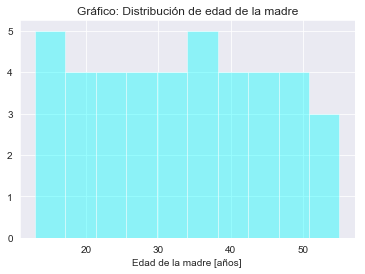

In [0]:
sns.set_style('dark')#darkgrid, whitegrid, dark, white
sns.distplot(e_años.index,kde=False,color='cyan',bins=10)
plt.title('Gráfico: Distribución de edad de la madre')
plt.xlabel('Edad de la madre [años]')
plt.grid(True)
plt.savefig(ruta_graficos+'distribución edad de la madre.png')
plt.show()


Volver al [Indice](#indice)

<a id='semanas'></a>
***Semanas de gestación***

In [0]:
data['Semanas de Embarazo'].value_counts()

In [0]:
SemEmbarazo = data[(data['Semanas de Embarazo']>3)&
                   ((data['SUB_CLASSIFICATION']=='Perfil Completo')|
                   (data['SUB_CLASSIFICATION']=='Recuperadas'))]['Semanas de Embarazo'].dropna()

print('\nAnálisis Estadístico Descriptivo')
print('--------------------------------\n')
print('El total de muestras utilizadas:', SemEmbarazo.count(),'\n')
print('El valor máximo de Semanas de Embarazo es:', SemEmbarazo.max(),'\n')
print('El valor mínimo de Semanas de Embarazo es:', SemEmbarazo.min(),'\n')
print('La media de Semanas de Embarazo es: ',round(SemEmbarazo.mean(),2),'\n')
print('La desviación estándar de Semanas de Embarazo es:',round(SemEmbarazo.std(),2),'\n')
print('La mediana de Semanas de Embarazo es:',SemEmbarazo.median(),'\n')
print('La moda de Semanas de Embarazo es:',SemEmbarazo.mode()[0],'\n')
print('Los percentiles de la variable [Semanas de Embarazo] de las muestras se listan a continuación:')
percentil=SemEmbarazo.quantile([.25,.50,.75,.90,.95,.995]).to_frame()
percentil.columns = ['']
percentil.index = (percentil.index*100).astype(str)+'%'
percentil.to_csv(ruta_output+'percentiles semanas gestación.csv')
percentil

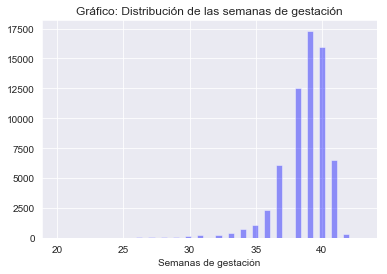

In [0]:
sns.set_style('dark')#darkgrid, whitegrid, dark, white
sns.distplot(SemEmbarazo,kde=False,color='blue')
plt.title('Gráfico: Distribución de las semanas de gestación')
plt.xlabel('Semanas de gestación')
plt.grid(True)
plt.savefig(ruta_graficos+'distribución semanas gestación.png')
plt.show()


In [0]:
rango1 = data[(data['Semanas de Embarazo']>3.0)&
              (data['Semanas de Embarazo']<36.0)]['Semanas de Embarazo'].count()

rango2 = data[(data['Semanas de Embarazo']>=36.0)&
              (data['Semanas de Embarazo']<=38.0)]['Semanas de Embarazo'].count()

rango3 = data[(data['Semanas de Embarazo']>=39.0)&
              (data['Semanas de Embarazo']<=40.0)]['Semanas de Embarazo'].count()

rango4 = data[(data['Semanas de Embarazo']>=41.0)&
              (data['Semanas de Embarazo']<=42.0)]['Semanas de Embarazo'].count()

rango5 = data[(data['Semanas de Embarazo']>42.0)]['Semanas de Embarazo'].count()

rango6 = data[(data['Semanas de Embarazo']<=3.0)]['Semanas de Embarazo'].count()

total = data['Semanas de Embarazo'].count()

semGest = pd.Series(data = rango1,index = ['< a 36'])
semGest = semGest.append(pd.Series(data = rango2,index = ['36 a 38']))
semGest = semGest.append(pd.Series(data = rango3,index = ['39 a 40']))
semGest = semGest.append(pd.Series(data = rango4,index = ['41 a 42']))
semGest = semGest.append(pd.Series(data = rango5,index = ['> a 42']))
semGest = semGest.append(pd.Series(data = rango6,index = ['sin especificar']))
semGest = semGest.append(pd.Series(data = total,index = ['Total']))

semGest = semGest.to_frame()
semGest.columns=['conteo']
semGest['%']= round(semGest['conteo']/semGest['conteo']['Total']*100,1)
semGest.to_csv(ruta_output+'segmentación semanas gestación.csv')
semGest

,conteo,%
< a 36,3925,5.2
36 a 38,23952,31.8
39 a 40,38406,51.1
41 a 42,8034,10.7
> a 42,7,0.0
sin especificar,906,1.2
Total,75230,100.0


Volver al [Indice](#indice)

<a id='peso'></a>
***Peso al nacer***

In [0]:
PesoAlNacer = data[(data['SUB_CLASSIFICATION']=='Perfil Completo')|
                   (data['SUB_CLASSIFICATION']=='Recuperadas')]['Peso al nacer'].dropna()

print('\nAnálisis Estadístico Descriptivo')
print('--------------------------------\n')
print('El total de muestras utilizadas:', PesoAlNacer.count(),'\n')
print('El valor máximo de Peso al nacer es:', PesoAlNacer.max(),'\n')
print('El valor mínimo de Peso al nacer es:', PesoAlNacer.min(),'\n')
print('La media de Peso al nacer es: ',round(PesoAlNacer.mean(),2),'\n')
print('La desviación estándar de Peso al nacer es:',round(PesoAlNacer.std(),2),'\n')
print('La mediana de Peso al nacer es:',PesoAlNacer.median(),'\n')
print('La moda de Peso al nacer es:',PesoAlNacer.mode()[0],'\n')
print('Los percentiles de la variable [Peso al nacer] de las muestras se listan a continuación:')
percentil=PesoAlNacer.quantile([.25,.50,.75,.90,.95,.995]).to_frame()
percentil.columns = ['']
percentil.index = (percentil.index*100).astype(str)+'%'
percentil.to_csv(ruta_output+'percentiles peso al nacer.csv')
percentil

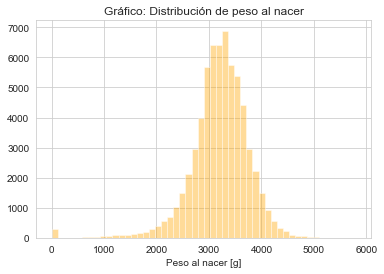

In [0]:
sns.set_style('whitegrid')
sns.distplot(PesoAlNacer,kde=False,color='orange')
plt.title('Gráfico: Distribución de peso al nacer')
plt.xlabel('Peso al nacer [g]')
plt.grid(True)
plt.savefig(ruta_graficos+'distribución peso al nacer.png')
plt.show()

In [0]:
data['Peso al nacer'].count()

75227

In [0]:
rango1 = data[(data['Peso al nacer']>3.0)&
              (data['Peso al nacer']<1000.0)]['Peso al nacer'].count()

rango2 = data[(data['Peso al nacer']>=1000.0)&
              (data['Peso al nacer']<=1500.0)]['Peso al nacer'].count()

rango3 = data[(data['Peso al nacer']>1500.0)&
            (data['Peso al nacer']<=2000.0)]['Peso al nacer'].count()

rango4 = data[(data['Peso al nacer']>2000.0)&
            (data['Peso al nacer']<=2500.0)]['Peso al nacer'].count()

rango5 = data[(data['Peso al nacer']>2500.0)&
            (data['Peso al nacer']<=3000.0)]['Peso al nacer'].count()

rango6 = data[(data['Peso al nacer']>3000.0)&
            (data['Peso al nacer']<=3500.0)]['Peso al nacer'].count()

rango7 = data[(data['Peso al nacer']>3500.0)&
            (data['Peso al nacer']<=4000.0)]['Peso al nacer'].count()

rango8 = data[(data['Peso al nacer']>4000.0)]['Peso al nacer'].count()

rango9 = data[(data['Peso al nacer']<=3.0)]['Peso al nacer'].count()

total = data['Peso al nacer'].count()

peso = pd.Series(data = rango1,index = ['< a 1000'])
peso = peso.append(pd.Series(data = rango2,index = ['1001 a 1500']))
peso = peso.append(pd.Series(data = rango3,index = ['1501 a 2000']))
peso = peso.append(pd.Series(data = rango4,index = ['2001 a 2500']))
peso = peso.append(pd.Series(data = rango5,index = ['2501 a 3000']))
peso = peso.append(pd.Series(data = rango6,index = ['3001 a 3500']))
peso = peso.append(pd.Series(data = rango7,index = ['3501 a 4000']))
peso = peso.append(pd.Series(data = rango8,index = ['> a 4000']))
peso = peso.append(pd.Series(data = rango9,index = ['sin especificar']))
peso = peso.append(pd.Series(data = total,index = ['Total']))

peso = peso.to_frame()
peso.columns=['conteo']
peso['%']= round(peso['conteo']/peso['conteo']['Total']*100,1)
peso.to_csv(ruta_output+'segmentación peso al nacer.csv')
peso

Volver al [Indice](#indice)

<a id='clasif'></a>
***Clasificación de muestras (Warncode)***

In [0]:
WC=data['WARNCODE'].value_counts().to_frame()
WC.columns=['cantidad']
WC

Volver al [Indice](#indice)

<a id='clasif_centro'></a>
***Clasificación de muestras (Warncode) por Centro***

In [0]:
lista=data['CATEGORIA'].unique().tolist()

categ = widgets.Dropdown(options=lista,
                         value=lista[0],
                         disabled=False,
                         description='Categoría')

incluir = widgets.Checkbox(value=False,
                           description='Incluir Ebais en Areas de Salud',
                           disabled=False)



display(widgets.HBox([categ,incluir]))

In [0]:
incluye=False

if (categ.value == 'Area de Salud') and (incluir.value==True):
    incluye=True
else:
    incluye=False
        
lista_centro = data[data['CATEGORIA']== categ.value]['Centro de Recolección'].unique().tolist()
centros = widgets.Dropdown(options=lista_centro,
                               disabled=False,
                               description='Centros')
  
display(centros)                    

Dropdown(description='Centros', options=('MATA REDONDA-HOSPITAL(CLINICA RICARDO MORENO CAÑAS)', 'HEREDIA-CUBUJ…

In [0]:
if incluye==False:
    warncod=data[(data['Centro de Recolección']==centros.value)]['WARNCODE'].value_counts().to_frame()
    warncod.columns=['cantidad']
else:
    cod=data[(data['CATEGORIA']==categ.value)&
             (data['Centro de Recolección']==centros.value)]['IDCentro'].value_counts().index.tolist()[0][:3]
    warncod=data[((data['CATEGORIA']=='Area de Salud')|
                  (data['CATEGORIA']=='EBAIS'))&
                  (data['IDCentro'].str[:3]==cod)]['WARNCODE'].value_counts().to_frame()

print('Categoría:',categ.value)
print('Centro:',centros.value)
print('Incluye EBAIS?',incluye)
warncod.to_csv(ruta_output+'listado warncode por centro.csv')
warncod

Volver al [Indice](#indice)

<a id='usuario'></a>
***Producción por usuario***

In [0]:
# Visualización de la producción por usuario según rango de fecha

lista = []
produc=data['USUARIO1DATA'].value_counts().to_frame()
produc.columns=['1DATA']
for usuario in produc.index.values.tolist():
    lista.append(data[(data['USUARIO2DATA']==usuario)]['USUARIO2DATA'].count())
produc['2DATA']=lista
produc.to_csv(ruta_output+'producción por usuario.csv')
produc

In [0]:
print('El total de muestras digitadas por 1er data entry es: ',produc['1DATA'].sum())
print('El total de muestras digitadas por 2do data entry es: ',produc['2DATA'].sum())

Volver al [Indice](#indice)

<a id='provincia'></a>
***Muestras por provincia***

In [0]:
data['Provincia'].count()

74677

In [0]:
data['Provincia'].value_counts().to_frame()

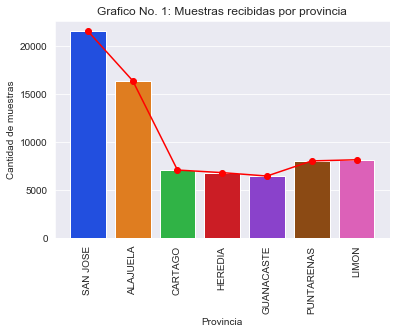

In [0]:
provincia = ['SAN JOSE','ALAJUELA','CARTAGO','HEREDIA','GUANACASTE','PUNTARENAS','LIMON']
sns.set_style('darkgrid')
sns.countplot(data['Provincia'],order = provincia)
plt.xticks(rotation=90)
plt.plot(df['Provincia'].value_counts().to_frame().reindex(provincia),'ro-')
plt.title('Grafico No. 1: Muestras recibidas por provincia')
plt.ylabel('Cantidad de muestras')
plt.savefig(ruta_graficos+'muestras por provincia.png')
plt.show()

In [0]:
for prov in data['Provincia'].unique():
    print('CANTONES DE PROVINCIA: ' + prov + '\n\n', df[df['Provincia'] == prov]['Canton'].value_counts())
    print()

In [0]:
# para buscar por número de muestra las inconsistencias de valores ingresados

data[(data['Provincia']=='SAN JOSE')&(data['Canton']=='ALAJUELA')]['Muestra']

In [0]:
for canton in data['Canton'].unique():
    print('DISTRITOS DE CANTON: ' + canton + '\n\n', data[data['Canton'] == canton]['Distrito'].value_counts())
    print()

In [0]:
data[(data['Canton']=='SAN JOSE')&(data['Distrito']== 'LOS GUIDO')]['Muestra']

Volver al [Indice](#indice)

<a id='jupyter'></a>
***Instrucciones para el uso de Jupyter Notebook***

Volver al [Indice](#indice)

<a id='markdown'></a>
***Instrucciones para escritura en Markdown***

Volver al [Indice](#indice)

<a id='python'></a>
***Descripción de algunas funciones de Python***

Volver al [Indice](#indice)